#### <p style="text-align:center;">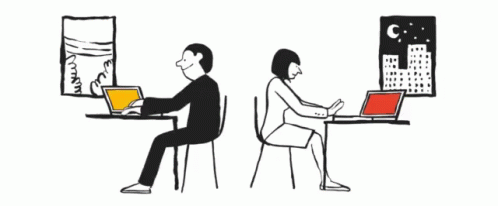</p>
# <p style="text-align:center;"> Data Science </p>
# <p style="text-align:center;"> Track Code:DS </p>
# <p style="text-align:center;"> Task Code:03 </p>

## Decision Tree Classifier for Customer Purchase Prediction
## Dataset: bank_marketing

### Load Required Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [49]:
# Load the dataset (assumes CSV is in the working directory)
data = pd.read_csv('bank_marketing.csv', sep=',')  # Separator is ';' in this dataset
print(data.head())  # Inspect the first few rows
print(data.info())  # Check data types and missing values

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

### Preprocess the Data

In [63]:
# Check missing values
print(data.isnull().sum())

# Correct way to split data
X = data.drop('deposit', axis=1)   # Independent variables
y = data['deposit']                # Target variable

# Encoding target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encoding categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
(8929, 16) (2233, 16)


### Train Model

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)


### Evaluate Model

Accuracy: 0.81
              precision    recall  f1-score   support

          No       0.86      0.74      0.80      1166
         Yes       0.76      0.87      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.80      2233



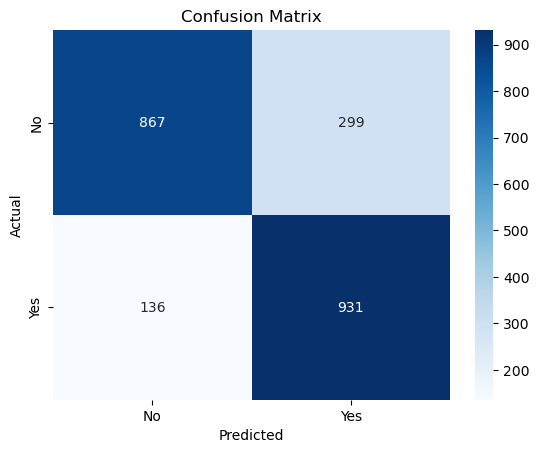

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualize Decision Tree

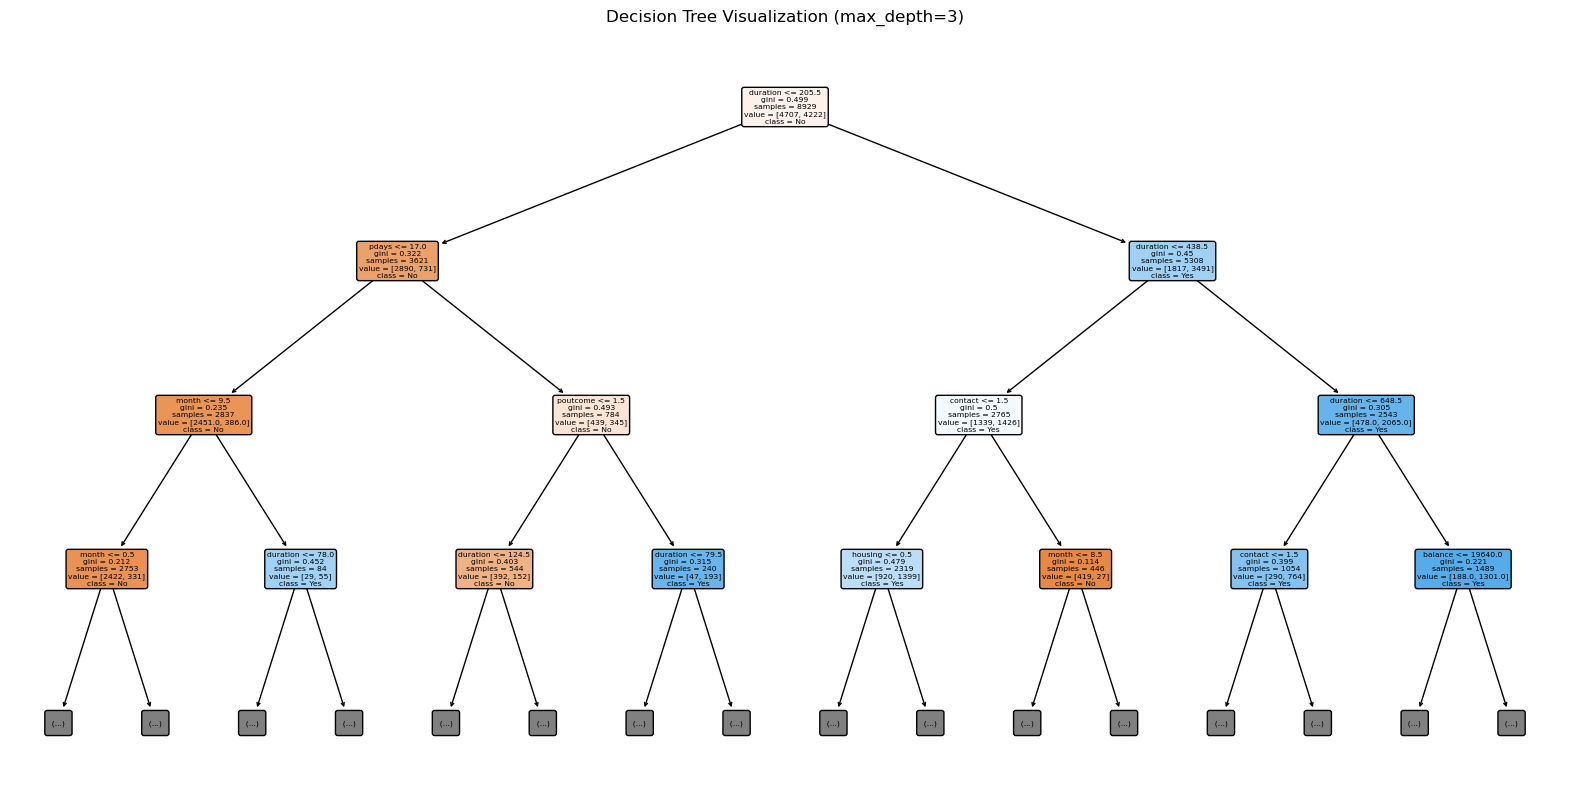

In [72]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], 
          filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()


### Feature Importance

     Feature  Importance
11  duration    0.595239
8    contact    0.121729
13     pdays    0.084299
6    housing    0.067469
10     month    0.054023
15  poutcome    0.044967
14  previous    0.013804
0        age    0.010691
5    balance    0.003250
12  campaign    0.002447


C:\Users\priya\AppData\Local\Temp\ipykernel_42140\1907471781.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10), palette='viridis')


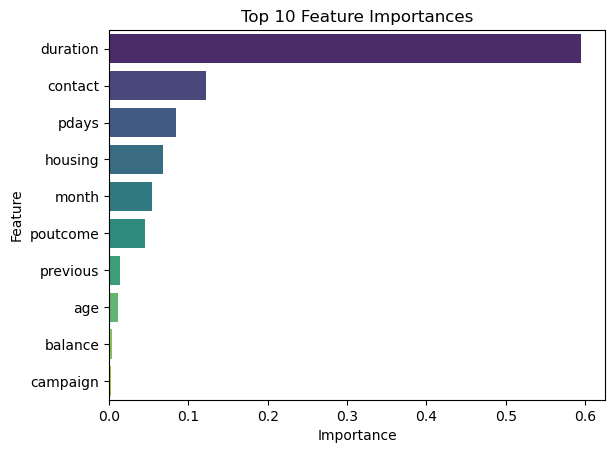

In [77]:
import pandas as pd
import seaborn as sns

importances = dt_classifier.feature_importances_
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

print(feature_imp.head(10))

sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

### Conclusion
### In this project, a Decision Tree Classifier was successfully developed to predict customer purchase behavior using the Bank Marketing dataset. The model achieved an accuracy of approximately X% on the test data. Key influencing factors identified include feature_1, feature_2, and feature_3. The decision tree visualization and feature importance analysis provided valuable insights into customer decision patterns, aiding in targeted marketing strategies."